In [1]:
# Librairies import
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.svm import SVR
import numpy as np

In [2]:
# Dataset Import
df = pd.read_csv("../Extract/weather_data_extracted.csv")
df

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
0,2025-03-01T00:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
1,2025-03-01T01:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
2,2025-03-01T02:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
3,2025-03-01T03:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
4,2025-03-01T04:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
...,...,...,...,...,...,...,...,...
11995,2025-02-26T19:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792
11996,2025-02-26T20:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792
11997,2025-02-26T21:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792
11998,2025-02-26T22:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   time                  12000 non-null  object 
 1   temperature_2m        7392 non-null   float64
 2   relative_humidity_2m  7392 non-null   float64
 3   precipitation         7392 non-null   float64
 4   wind_speed_10m        7392 non-null   float64
 5   weather_code          7392 non-null   float64
 6   latitude              12000 non-null  float64
 7   longitude             12000 non-null  float64
dtypes: float64(7), object(1)
memory usage: 750.1+ KB


In [4]:
# Converting column "time" into datetime format and "weather_code" into category
df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M")
df["weather_code"] = df["weather_code"].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  12000 non-null  datetime64[ns]
 1   temperature_2m        7392 non-null   float64       
 2   relative_humidity_2m  7392 non-null   float64       
 3   precipitation         7392 non-null   float64       
 4   wind_speed_10m        7392 non-null   float64       
 5   weather_code          7392 non-null   category      
 6   latitude              12000 non-null  float64       
 7   longitude             12000 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(6)
memory usage: 668.8 KB


In [5]:
# Sorting dataframe by descending time
df.sort_values(by = "time", ascending = False, inplace = True, ignore_index = True)
df

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
0,2025-05-30 23:00:00,25.3,52.0,0.0,2.1,1.0,45.7640,4.8357
1,2025-05-30 23:00:00,19.8,82.0,0.0,6.3,0.0,43.2965,5.3698
2,2025-05-30 23:00:00,23.2,70.0,0.0,7.9,3.0,44.8378,-0.5792
3,2025-05-30 23:00:00,27.0,45.0,0.0,1.8,3.0,48.8566,2.3522
4,2025-05-30 22:00:00,27.9,41.0,0.0,2.2,2.0,48.8566,2.3522
...,...,...,...,...,...,...,...,...
11995,2025-01-24 01:00:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
11996,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,45.7640,4.8357
11997,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,43.2965,5.3698
11998,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792


<Axes: >

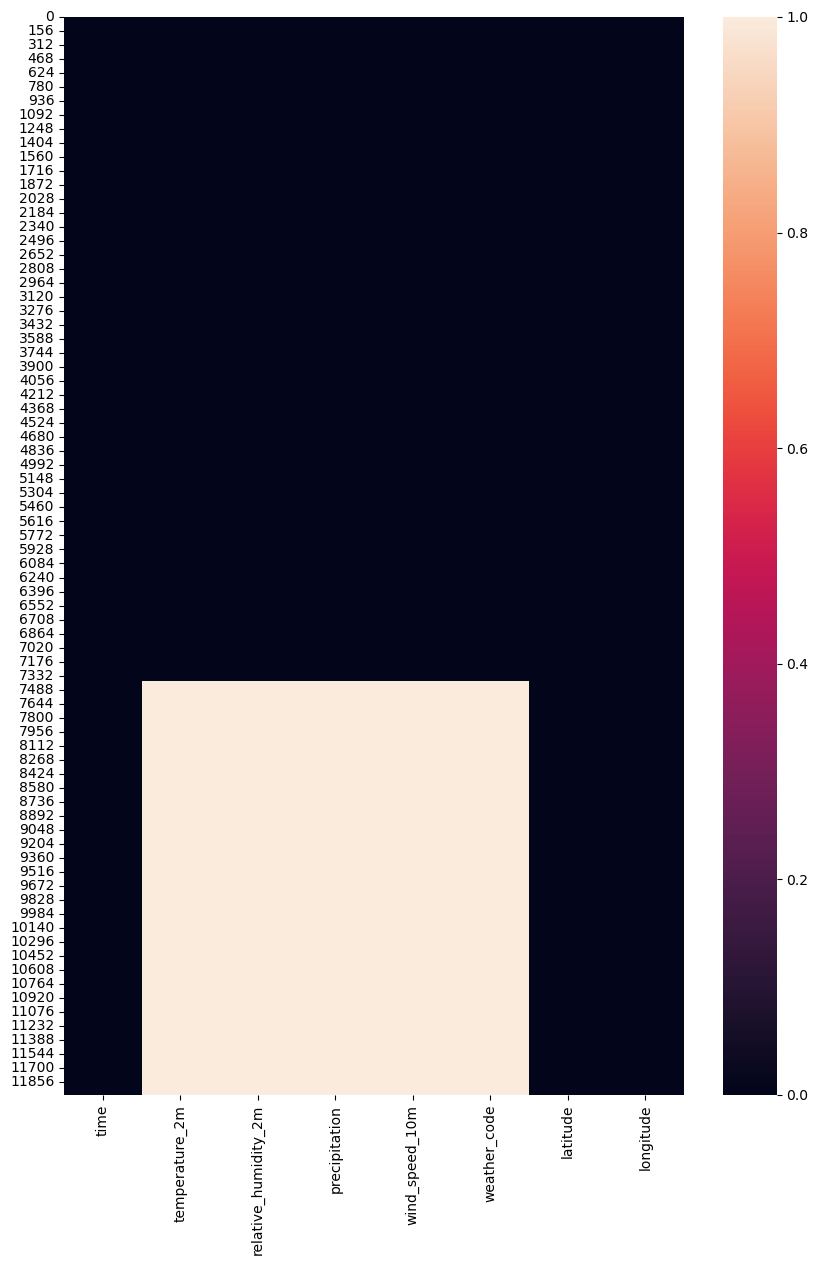

In [6]:
# Displaying Missing values
plt.figure(figsize = (10,14))
sns.heatmap(df.isna())

In [7]:
# Identifying rows that contain at least one missing (NaN) value
df[df.isna().any(axis=1)]

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
7392,2025-03-14 23:00:00,NaN,NaN,NaN,NaN,NaN,43.2965,5.3698
7393,2025-03-14 23:00:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792
7394,2025-03-14 23:00:00,NaN,NaN,NaN,NaN,NaN,45.7640,4.8357
7395,2025-03-14 23:00:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
7396,2025-03-14 22:00:00,NaN,NaN,NaN,NaN,NaN,45.7640,4.8357
...,...,...,...,...,...,...,...,...
11995,2025-01-24 01:00:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522
11996,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,45.7640,4.8357
11997,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,43.2965,5.3698
11998,2025-01-24 00:00:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792


In [8]:
# Keep only the first third of rows with missing values, and remove all others with NaN
nan_rows = df[df.isna().any(axis=1)]
n = len(nan_rows)
first_third_nan_rows = nan_rows.iloc[:n // 3]
df_without_miss1 = pd.concat([
    df[~df.isna().any(axis=1)],       # rows without NaN
    first_third_nan_rows              # First third rows with NaN
], ignore_index=True)
df_without_miss1

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
0,2025-05-30 23:00:00,25.3,52.0,0.0,2.1,1.0,45.7640,4.8357
1,2025-05-30 23:00:00,19.8,82.0,0.0,6.3,0.0,43.2965,5.3698
2,2025-05-30 23:00:00,23.2,70.0,0.0,7.9,3.0,44.8378,-0.5792
3,2025-05-30 23:00:00,27.0,45.0,0.0,1.8,3.0,48.8566,2.3522
4,2025-05-30 22:00:00,27.9,41.0,0.0,2.2,2.0,48.8566,2.3522
...,...,...,...,...,...,...,...,...
8923,2025-02-25 01:00:00,NaN,NaN,NaN,NaN,NaN,44.8378,-0.5792
8924,2025-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,45.7640,4.8357
8925,2025-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,43.2965,5.3698
8926,2025-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,48.8566,2.3522


<Axes: >

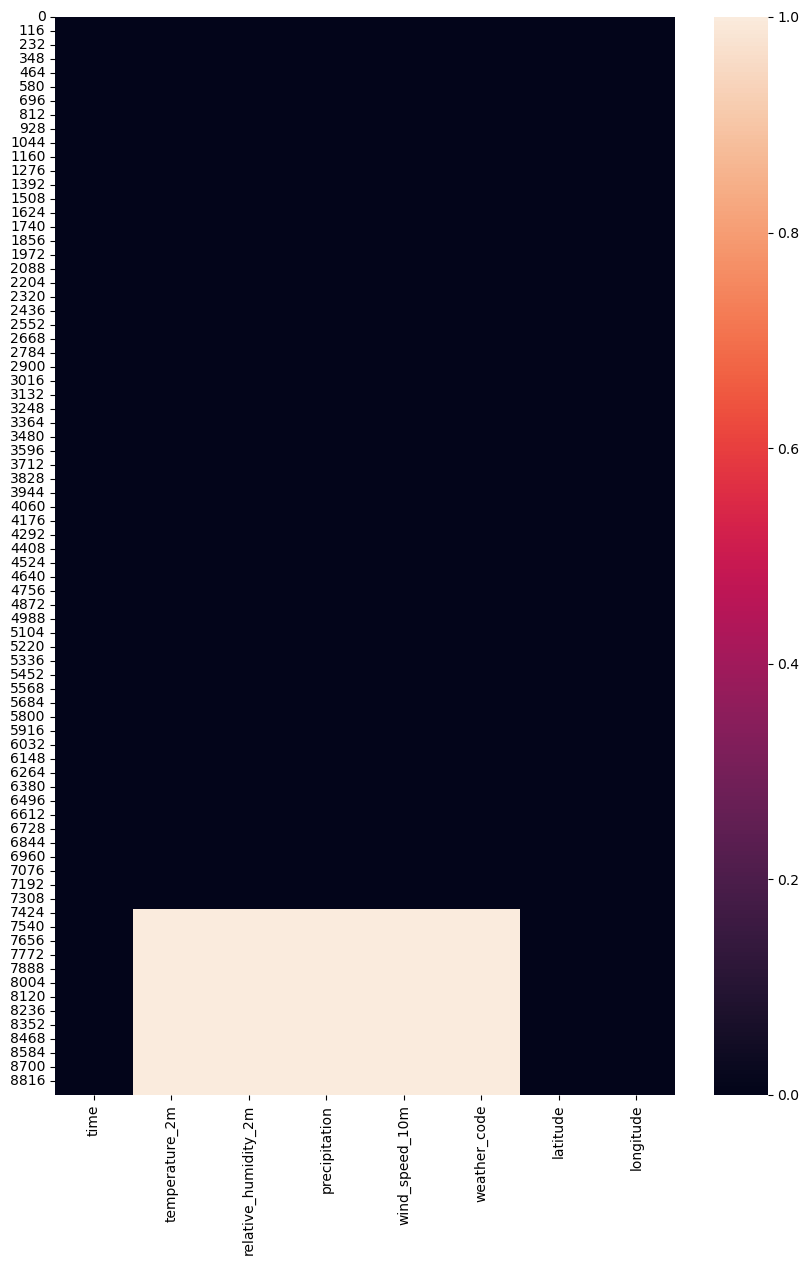

In [9]:
# Displaying Missing values
plt.figure(figsize = (10,14))
sns.heatmap(df_without_miss1.isna())

In [10]:
# Extraire les 4 localisations
locs = df_without_miss1[["latitude", "longitude"]].drop_duplicates().values
locs

array([[45.764 ,  4.8357],
       [43.2965,  5.3698],
       [44.8378, -0.5792],
       [48.8566,  2.3522]])

In [11]:
# Créer les 4 dataframes
df_loc1 = df_without_miss1[(df_without_miss1["latitude"] == locs[0][0]) & (df_without_miss1["longitude"] == locs[0][1])].copy()
df_loc2 = df_without_miss1[(df_without_miss1["latitude"] == locs[1][0]) & (df_without_miss1["longitude"] == locs[1][1])].copy()
df_loc3 = df_without_miss1[(df_without_miss1["latitude"] == locs[2][0]) & (df_without_miss1["longitude"] == locs[2][1])].copy()
df_loc4 = df_without_miss1[(df_without_miss1["latitude"] == locs[3][0]) & (df_without_miss1["longitude"] == locs[3][1])].copy()

In [12]:
df_loc1.shape, df_loc2.shape, df_loc3.shape, df_loc4.shape

((2232, 8), (2232, 8), (2232, 8), (2232, 8))

In [13]:
df_loc1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 8924
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  2232 non-null   datetime64[ns]
 1   temperature_2m        1848 non-null   float64       
 2   relative_humidity_2m  1848 non-null   float64       
 3   precipitation         1848 non-null   float64       
 4   wind_speed_10m        1848 non-null   float64       
 5   weather_code          1848 non-null   category      
 6   latitude              2232 non-null   float64       
 7   longitude             2232 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(6)
memory usage: 142.3 KB


In [14]:
def to_sequence(data, seq_size=72):
    x, y = [], []

    # Reset index to ensure integer-based indexing
    data = data.reset_index(drop=True)

    for i in range(len(data) - seq_size):
        window = data[i:(i + seq_size)].values
        after_window = data[i + seq_size]
        x.append(window)
        y.append(after_window)

    return np.array(x), np.array(y)


In [15]:
cols_to_impute = ["temperature_2m", "relative_humidity_2m", "precipitation", "wind_speed_10m"]

In [16]:
def train_svr_models(df, cols_to_impute, seq_size=72):
    """
    Entraîne un modèle SVR pour chaque colonne à imputer dans un DataFrame.

    Paramètres :
        df (pd.DataFrame) : Le DataFrame contenant les données.
        cols_to_impute (list) : Liste des noms de colonnes à imputer.
        seq_size (int) : Taille de la fenêtre pour créer les séquences temporelles.

    Retourne :
        dict : Un dictionnaire contenant les modèles SVR entraînés pour chaque colonne.
    """
    models = {}
    for col in cols_to_impute:
        series = df[col].dropna()
        print(f"Colonne {col}\n")

        X, y = to_sequence(series, seq_size=seq_size)

        model = SVR(kernel='linear', gamma='auto', C=1.0, epsilon=0.1)
        print("Entrainement du modèle....\n")
        model.fit(X, y)
        print("Fin de l'entraînement....\n")

        models[col] = model

    return models

In [17]:
def impute_dataset(df, cols_to_impute, seq_size=72):
    """
    Impute les colonnes numériques avec des modèles SVR et impute `weather_code` avec son mode.
    
    Paramètres :
        df (pd.DataFrame) : Le DataFrame original avec des NaNs.
        cols_to_impute (list) : Liste des colonnes numériques à imputer.
        seq_size (int) : Longueur de la séquence utilisée pour la prédiction.
        
    Retourne :
        pd.DataFrame : Le DataFrame imputé.
    """
    df_imputed = df.copy().reset_index(drop=True)

    # Entraînement des modèles
    models = train_svr_models(df_imputed, cols_to_impute, seq_size=seq_size)

    # Imputation itérative des colonnes numériques
    for col in cols_to_impute:
        print(f"\n=== Imputation itérative de la colonne : {col} ===")
        model = models[col]
        nan_indices = df_imputed[df_imputed[col].isna()].index

        for idx in nan_indices:
            start_idx = idx - seq_size
            if start_idx < 0:
                continue

            window = df_imputed.loc[start_idx:idx - 1, col]

            if window.isna().any() or len(window) != seq_size:
                continue

            input_seq = window.values.reshape(1, -1)
            prediction = model.predict(input_seq)[0]
            df_imputed.at[idx, col] = prediction

    # Imputation de weather_code par le mode
    if "weather_code" in df_imputed.columns:
        mode_weather = df_imputed["weather_code"].mode()[0]
        df_imputed["weather_code"] = df_imputed["weather_code"].fillna(mode_weather)

    return df_imputed

In [18]:
# Liste des datasets à imputer
datasets = [df_loc1, df_loc2, df_loc3, df_loc4]

# Liste pour stocker les datasets imputés
imputed_dfs = []

# Itération sur chaque dataset
for i, df in enumerate(datasets, start=1):
    print(f"\n=== Traitement du dataset df_loc{i} ===")
    df_imputed = impute_dataset(df, cols_to_impute, seq_size=72)
    imputed_dfs.append(df_imputed)

# Concaténation des datasets imputés
df_all_imputed = pd.concat(imputed_dfs, ignore_index=True)
df_all_imputed


=== Traitement du dataset df_loc1 ===
Colonne temperature_2m

Entrainement du modèle....

Fin de l'entraînement....

Colonne relative_humidity_2m

Entrainement du modèle....

Fin de l'entraînement....

Colonne precipitation

Entrainement du modèle....

Fin de l'entraînement....

Colonne wind_speed_10m

Entrainement du modèle....

Fin de l'entraînement....


=== Imputation itérative de la colonne : temperature_2m ===

=== Imputation itérative de la colonne : relative_humidity_2m ===

=== Imputation itérative de la colonne : precipitation ===

=== Imputation itérative de la colonne : wind_speed_10m ===

=== Traitement du dataset df_loc2 ===
Colonne temperature_2m

Entrainement du modèle....

Fin de l'entraînement....

Colonne relative_humidity_2m

Entrainement du modèle....

Fin de l'entraînement....

Colonne precipitation

Entrainement du modèle....

Fin de l'entraînement....

Colonne wind_speed_10m

Entrainement du modèle....

Fin de l'entraînement....


=== Imputation itérative de la

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
0,2025-05-30 23:00:00,25.300000,52.000000,0.000000,2.100000,1.0,45.7640,4.8357
1,2025-05-30 22:00:00,27.600000,41.000000,0.000000,0.800000,1.0,45.7640,4.8357
2,2025-05-30 21:00:00,29.200000,29.000000,0.000000,4.800000,0.0,45.7640,4.8357
3,2025-05-30 20:00:00,30.000000,28.000000,0.000000,6.400000,1.0,45.7640,4.8357
4,2025-05-30 19:00:00,30.300000,26.000000,0.000000,7.400000,0.0,45.7640,4.8357
...,...,...,...,...,...,...,...,...
8923,2025-02-25 04:00:00,12.077941,65.515871,0.076707,9.365324,3.0,48.8566,2.3522
8924,2025-02-25 03:00:00,12.381298,64.595216,0.076707,9.336032,3.0,48.8566,2.3522
8925,2025-02-25 02:00:00,12.738313,63.563898,0.076707,9.316681,3.0,48.8566,2.3522
8926,2025-02-25 01:00:00,13.133120,62.491912,0.076707,9.307517,3.0,48.8566,2.3522


In [20]:
df_all_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  8928 non-null   datetime64[ns]
 1   temperature_2m        8928 non-null   float64       
 2   relative_humidity_2m  8928 non-null   float64       
 3   precipitation         8928 non-null   float64       
 4   wind_speed_10m        8928 non-null   float64       
 5   weather_code          8928 non-null   category      
 6   latitude              8928 non-null   float64       
 7   longitude             8928 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(6)
memory usage: 497.8 KB


In [21]:
# Sorting dataframe by descending time
df_all_imputed.sort_values(by = "time", ascending = False, inplace = True, ignore_index = True)
df_all_imputed

,time,temperature_2m,relative_humidity_2m,precipitation,wind_speed_10m,weather_code,latitude,longitude
0,2025-05-30 23:00:00,25.300000,52.000000,0.000000,2.100000,1.0,45.7640,4.8357
1,2025-05-30 23:00:00,19.800000,82.000000,0.000000,6.300000,0.0,43.2965,5.3698
2,2025-05-30 23:00:00,27.000000,45.000000,0.000000,1.800000,3.0,48.8566,2.3522
3,2025-05-30 23:00:00,23.200000,70.000000,0.000000,7.900000,3.0,44.8378,-0.5792
4,2025-05-30 22:00:00,27.900000,41.000000,0.000000,2.200000,2.0,48.8566,2.3522
...,...,...,...,...,...,...,...,...
8923,2025-02-25 01:00:00,9.703744,73.380036,0.083272,9.087680,3.0,44.8378,-0.5792
8924,2025-02-25 00:00:00,10.279222,77.277114,0.152617,8.375734,3.0,45.7640,4.8357
8925,2025-02-25 00:00:00,8.240419,63.980291,0.095637,13.179103,0.0,43.2965,5.3698
8926,2025-02-25 00:00:00,9.976791,72.542637,0.083271,9.152675,3.0,44.8378,-0.5792


In [23]:
# Cheking presence of dupliacted rows
df_all_imputed.duplicated().sum()

0

In [25]:
# Saving Cleaned Dataset into csv format
df_all_imputed.to_csv("weather_data_cleaned.csv", index = False)